# An Exploratory Data Analysis
## for the RSNA Breast Cancer Detection Competition on Kaggle

**This Notebook is an _exploratory data analysis (EDA)_ for the competition [RSNA Breast Cancer Detection Competition](https://www.kaggle.com/competitions/rsna-breast-cancer-detection/data?select=test.csv) on Kaggle.**

RSNA - The Radiological Society of North America

In this notebook, we will be using a dataset that contains metadata for each patient.

The goal is to understand the characteristics of the data and identify any potential issues or inconsistencies that may need to be taken into considereation before moving on to the ML phase of analyses - identifying cases of breast cancer in mammograms.

The dataset contains radiographic female breast images

- We will load the data and take a look at the structure of the meta data.
- Besides that, we will perform some basic statistical analysis to get a sense of the overall distribution and range of values in the data.
- Additionally, we will visualize the data in various ways to help us to get a better understanding of the relationships between different variables and the underlying patterns present in the data.

Notebook Color Schemes:


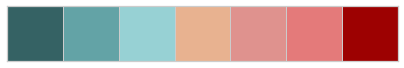

In [1]:
# General Libraries
import os
import math
import pandas as pd
import numpy as np
from pathlib import Path

# For the Visuals
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

# Custom colors
sns.set(style= 'whitegrid')
class clr:
    S = '\033[1m' + '\033[91m'
    E = '\033[0m'
    
my_colors = ["#356264", "#63A3A6", "#97D1D4", "#E8B290", 
             "#DF928E", "#E47A7A", "#9D0101"] ##B84949
CMAP1 = ListedColormap(my_colors)

print(clr.S+"Notebook Color Schemes:"+clr.E)
sns.palplot(sns.color_palette(my_colors))
plt.show()

## Exploring the patients metadata

In [2]:
# Read CSV data 
data_dir = Path("E:/ML/Kaggle Cancer Competition")
train = pd.read_csv(data_dir/"train.csv.zip", compression = 'zip')

In [3]:
# Check first three rows of CSV flat file.
train.head(3)

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False


## Basic Information provided by RSNA -  [Dataset Description](https://www.kaggle.com/competitions/rsna-breast-cancer-detection/data)

* site_id - ID code for the source hospital.
* patient_id - ID code for the patient.
* image_id - ID code for the image.
* laterality - Whether the image is of the left or right breast.
* view - The orientation of the image. The default for a screening exam is to capture two views per breast.
* age - The patient's age in years.
* implant - Whether or not the patient had breast implants. Site 1 only provides breast implant information at the patient level, not at the breast level.
* density - A rating for how dense the breast tissue is, with A being the least dense and D being the most dense. Extremely dense tissue can make diagnosis more difficult.
* machine_id - An ID code for the imaging device.
* cancer - Whether or not the breast was positive for malignant cancer. The target value.
* biopsy - Whether or not a follow-up biopsy was performed on the breast.
* invasive - If the breast is positive for cancer, whether or not the cancer proved to be invasive.
* BIRADS - 0 if the breast required follow-up, 1 if the breast was rated as negative for cancer, and 2 if the breast was rated as normal.
* difficult_negative_case - True if the case was unusually difficult.

In [4]:
train.shape

(54706, 14)

In [5]:
train.dtypes

site_id                      int64
patient_id                   int64
image_id                     int64
laterality                  object
view                        object
age                        float64
cancer                       int64
biopsy                       int64
invasive                     int64
BIRADS                     float64
implant                      int64
density                     object
machine_id                   int64
difficult_negative_case       bool
dtype: object

In [6]:
train.describe()

,site_id,patient_id,image_id,age,cancer,biopsy,invasive,BIRADS,implant,machine_id
count,54706.000000,54706.000000,5.470600e+04,54669.000000,54706.000000,54706.000000,54706.000000,26286.000000,54706.000000,54706.000000
mean,1.460407,32698.865262,1.079386e+09,58.543928,0.021168,0.054272,0.014953,0.772350,0.026999,54.618378
std,0.498434,18893.861534,6.183269e+08,10.050884,0.143944,0.226556,0.121365,0.590062,0.162081,44.784800
min,1.000000,5.000000,6.849100e+04,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
25%,1.000000,16481.000000,5.458153e+08,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000
50%,1.000000,32432.000000,1.082689e+09,59.000000,0.000000,0.000000,0.000000,1.000000,0.000000,49.000000
75%,2.000000,48999.000000,1.613228e+09,66.000000,0.000000,0.000000,0.000000,1.000000,0.000000,49.000000
max,2.000000,65534.000000,2.147472e+09,89.000000,1.000000,1.000000,1.000000,2.000000,1.000000,216.000000


In [3]:
print(f"\033[1mNumber of records in the dataset is : {train.shape[0]}")
print(f"\033[1mNumber of unique patients : {train.patient_id.nunique()}")

Number of records in the dataset is : 54706
Number of unique patients : 11913


# Missing Data

In [4]:
train.isnull().sum().to_frame(name='Number of Null Values')

,Number of Null Values
site_id,0
patient_id,0
image_id,0
laterality,0
view,0
age,37
cancer,0
biopsy,0
invasive,0
BIRADS,28420


**There are missing values only for age, BIRADS and density.**

In [5]:
#Duplicated data
train.loc[train.duplicated()]

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case


In [6]:
print(clr.S+"There is not any duplicated data"+clr.E)

There is not any duplicated data


# Images

In [7]:
print(clr.S+"Statistics: Images per Patient"+clr.E)
print(train.groupby("patient_id")["image_id"].count().reset_index().describe()["image_id"])
print("-------------------------------------------------")
print(clr.S+"Total unique images:"+clr.E, train["image_id"].nunique())
print("-------------------------------------------------")

Statistics: Images per Patient
count    11913.000000
mean         4.592126
std          1.133216
min          4.000000
25%          4.000000
50%          4.000000
75%          5.000000
max         14.000000
Name: image_id, dtype: float64
-------------------------------------------------
Total unique images: 54706
-------------------------------------------------


## Numbers of Images Taken Per Patient

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


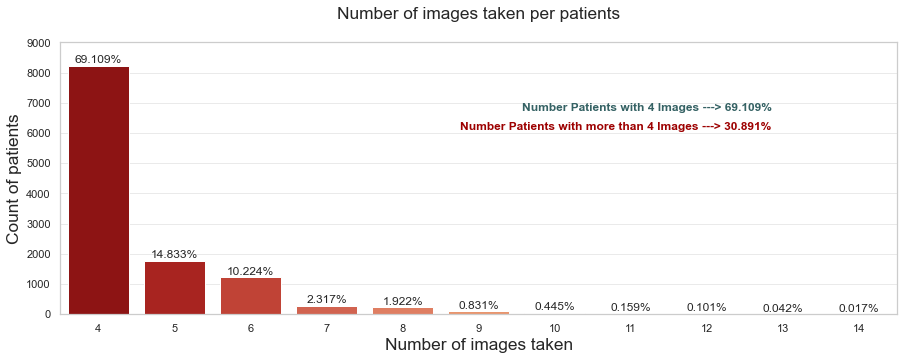

In [8]:
plt.figure(figsize=(15,5))

ax = sns.countplot(train.groupby('patient_id').size(), palette = 'OrRd_r')
t=train['patient_id'].nunique();ax.set_ylim(0,9000) 

for p in ax.patches:
    percentage = f'{100 * p.get_height() / t:.3f}%\n';x = p.get_x() + p.get_width() / 2 ; y = p.get_height();
    ax.annotate(percentage, (x, y), ha='center', va='center');ax.grid(axis='y', linestyle='-', alpha=0.4) 
    
ax.text(x=0.85, y=0.78, transform=ax.transAxes, s="Number Patients with 4 Images ---> 69.109%", fontsize=12, color = my_colors[0], fontweight='bold', verticalalignment='top', horizontalalignment='right')
ax.text(x=0.85, y=0.71, transform=ax.transAxes, s="Number Patients with more than 4 Images ---> 30.891%", fontsize=12, color= my_colors[6],   fontweight='bold', verticalalignment='top', horizontalalignment='right')

plt.title("Number of images taken per patients\n", fontsize = 'x-large')
plt.xlabel('Number of images taken', fontsize = 'x-large')
plt.ylabel('Count of patients',fontsize = 'x-large')

plt.show()

**Most of the patients has 4 images (2 views per side - left and right).
However more than 30% patients have more of them.**


## Laterality

In [9]:
#Image records count per laterality (R) and Image records count per laterality (L)

images_per_laterality = train.groupby('laterality', as_index = False) \
                            .agg({'image_id':'count'}) \
                            .rename(columns = {'image_id':'number_images'})
images_per_laterality

,laterality,number_images
0,L,27267
1,R,27439


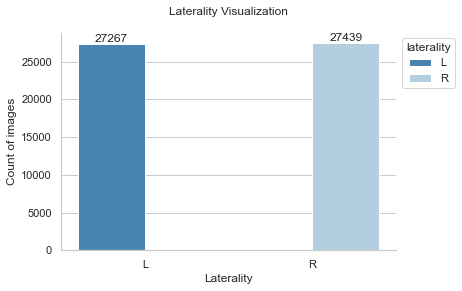

In [10]:
sns.set(font_scale = 1, style= 'whitegrid')

ax = sns.barplot(data=images_per_laterality, x='laterality', y = 'number_images',
                 palette='Blues_r', hue = 'laterality')
for i in ax.containers:
    ax.bar_label(i,)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.title("Laterality Visualization\n")
plt.xlabel('Laterality')
plt.ylabel('Count of images')
sns.despine()

In [11]:
print(clr.S+"Image records count per laterality (R):"+clr.E, train["laterality"].value_counts().values[0], "\n"+
      clr.S+"Image records count per laterality (L):"+clr.E, train["laterality"].value_counts().values[1])

Image records count per laterality (R): 27439 
Image records count per laterality (L): 27267


# Laterality and View

view - The orientation of the image. The default for a screening exam is to capture two views per breast

During a screening exam, the patient goes to an imaging center for a scheduled appointment, and the mammogram technologist will perform two standard views: **craniocaudal (CC) and mediolateral oblique (MLO)**

In [12]:
images_per_view = train.groupby(['view', 'laterality'], as_index=False) \
                        .agg({'image_id':'count'}) \
                        .sort_values('image_id', ascending = False) \
                        .rename(columns={'image_id':'count_view'})
images_per_view

,view,laterality,count_view
9,MLO,L,13958
10,MLO,R,13945
3,CC,R,13470
2,CC,L,13295
1,AT,R,12
0,AT,L,7
5,LM,R,6
8,ML,R,5
4,LM,L,4
7,ML,L,3


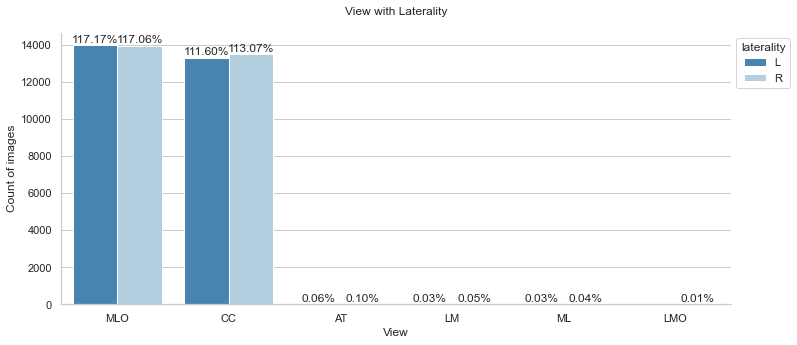

In [13]:
plt.figure(figsize=(12,5))
ax = sns.barplot(data=images_per_view, x = 'view', y = 'count_view', palette='Blues_r', hue = 'laterality')
# for i in ax.containers:
#     ax.bar_label(i,)
#     sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
for p in ax.patches:
        percentage = f'{100 * p.get_height() / t:.2f}%\n'
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2,p.get_height()), ha='center', va='center')

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title("View with Laterality\n")
plt.xlabel('View')
plt.ylabel('Count of images')
sns.despine()

In [14]:
print("-------------------------------------------------")
print(clr.S+"Image records count per View:"+clr.E)
print(train["view"].value_counts())

-------------------------------------------------
Image records count per View:
MLO    27903
CC     26765
AT        19
LM        10
ML         8
LMO        1
Name: view, dtype: int64


**Image records count per View means the orientation of the image.**

The values for this variable are:
- MLO (mediolateral oblique) - 27903 images
- CC (craniocaudal) - 26765 images
- AT (axillary tail) - 19 images
- LM (latero-medial) - 10 images
- ML (medio-lateral) - 8 images
- LMO (latero-medial oblique) - 1 images

# Age Distribution

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


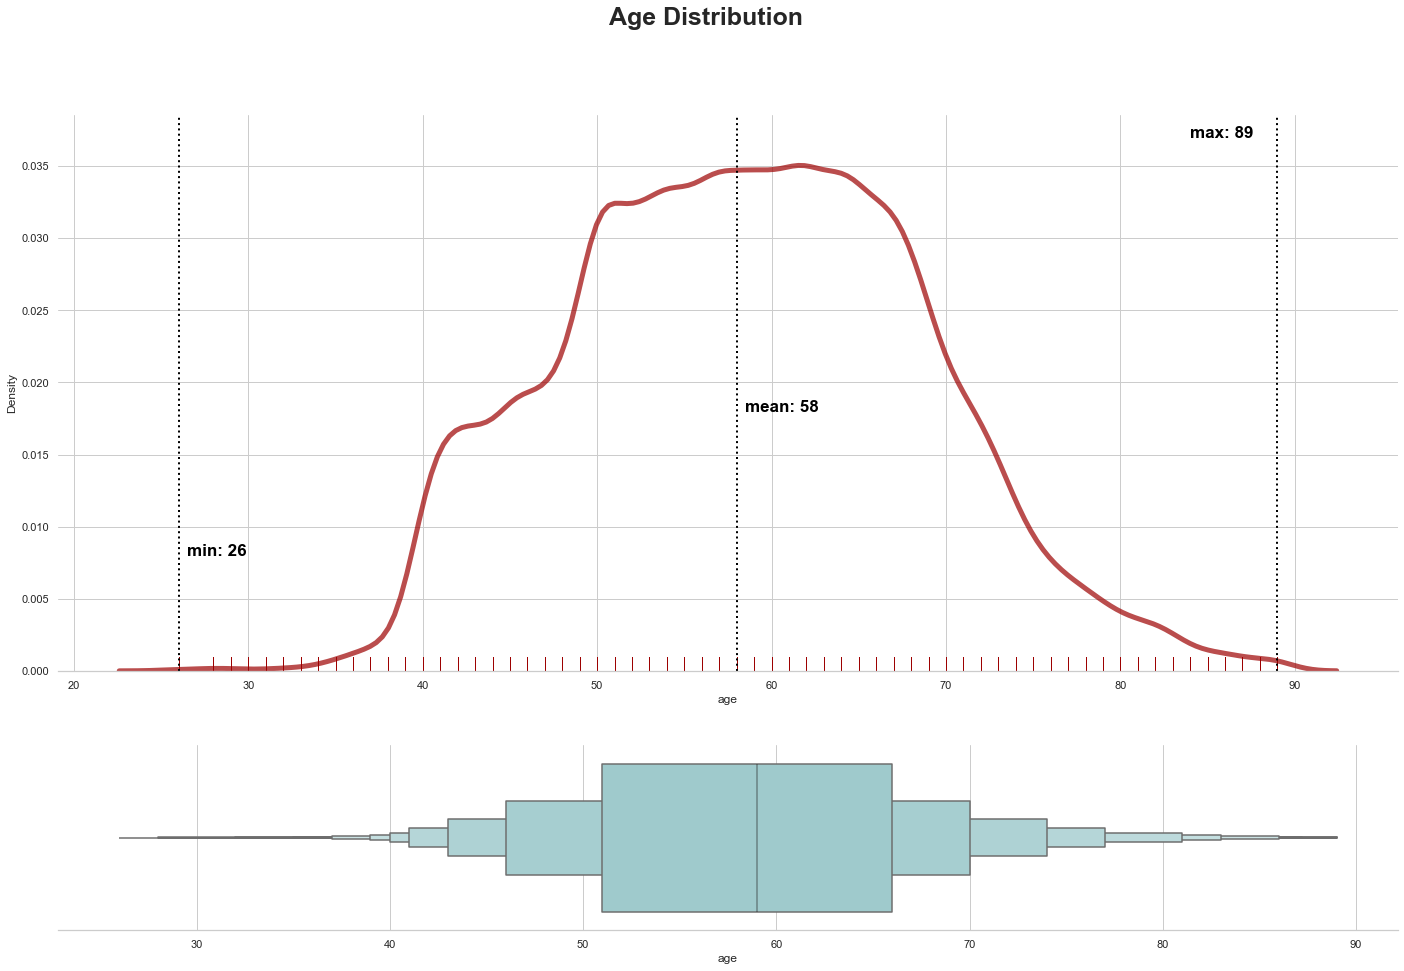

In [43]:
f, (a0, a1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]}, figsize=(24, 15))
sns.distplot(a=train["age"], rug=True, hist=False, 
             rug_kws={"color": my_colors[6]},
             kde_kws={"color": my_colors[6], "lw": 5, "alpha": 0.7},
             ax=a0)

a0.axvline(x=58, ls=":", lw=2, color="black")
a0.text(x=58.5, y=0.018, s="mean: 58", size=17, color="black", weight="bold")
a0.axvline(x=26, ls=":", lw=2, color="black")
a0.text(x=26.5, y=0.008, s="min: 26", size=17, color="black", weight="bold")
a0.axvline(x=89, ls=":", lw=2, color="black")
a0.text(x=84, y=0.037, s="max: 89", size=17, color="black", weight="bold")

sns.boxenplot(x=train["age"], ax=a1, color=my_colors[2])

plt.suptitle("Age Distribution", weight="bold", size=25)
sns.despine(right=True, top=True, left=True);

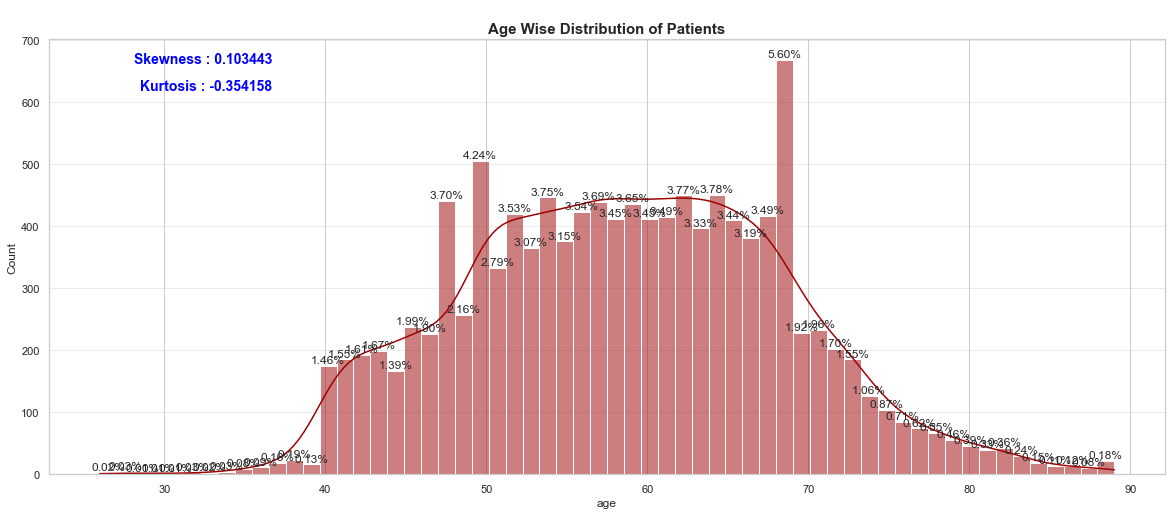

In [23]:
#age distribution
age_df = train[train.age.isnull() == False].groupby('patient_id')['age'].apply(lambda x: (np.unique(x)[0]))

plt.figure(figsize=(20,8))
ax = sns.histplot(age_df, bins=60,kde=True,color=my_colors[6]) 
ax.grid(axis='y', linestyle='-', alpha=0.4)

sns.set_style("whitegrid")
ax.text(x=0.2, y=0.97, transform=ax.transAxes, s="Skewness : %f" % age_df.skew(),fontsize=14, color='blue', fontweight='bold', verticalalignment='top', horizontalalignment='right')
ax.text(x=0.2, y=0.91, transform=ax.transAxes, s="Kurtosis : %f" % age_df.kurt(),fontsize=14, color='blue', fontweight='bold', verticalalignment='top', horizontalalignment='right')

for p in ax.patches:
    percentage = f'{100 * p.get_height() / age_df.shape[0]:.2f}%\n'
    plt.annotate(percentage, (p.get_x() + p.get_width() / 2,p.get_height()), ha='center', va='center')
    ax.set_title("\nAge Wise Distribution of Patients", fontsize=15, fontweight='bold')

plt.show()


Age is having a positive skew but of only 0.103443 and kurtosis as -0.354158

There is a peek in age between 67-69.

In [17]:
# max_age and mean_age
print(f"\033[1mAge is having max value : {train['age'].max()}")
print(f"\033[1mAge is having median value : {round(train['age'].mean(), 0)}")

Age is having max value : 89.0
Age is having median value : 59.0


Text(0.5, 1.0, 'Patients without / with cancer')

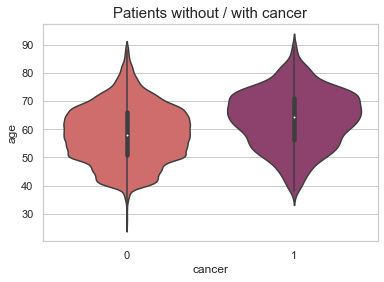

In [18]:
sns.violinplot(x = train.cancer, y = train.age, palette='flare')
plt.title("Patients without / with cancer", fontsize=15)

In [19]:
print(f"\033[1mAge is having median value for patients with cancer: {round(train[train['cancer'] == 1].groupby('patient_id')['age'].apply(lambda x: x.unique()[0]).mean(), 0)}")
print(f"\033[1mAge is having median value for patients without cancer: {round(train[train['cancer'] == 0].groupby('patient_id')['age'].apply(lambda x: x.unique()[0]).mean(), 0)}")

Age is having median value for patients with cancer: 63.0
Age is having median value for patients without cancer: 59.0


In [20]:
print(f"\033[1mAge is having max value for patients with cancer: {round(train[train['cancer'] == 1].groupby('patient_id')['age'].apply(lambda x: x.unique()[0]).max(), 0)}")
print(f"\033[1mAge is having max value for patients without cancer: {round(train[train['cancer'] == 0].groupby('patient_id')['age'].apply(lambda x: x.unique()[0]).max(), 0)}")

Age is having max value for patients with cancer: 89.0
Age is having max value for patients without cancer: 89.0


# BIRADS

0 if the breast required follow-up,

1 if the breast was rated as negative for cancer,

2 if the breast was rated as normal

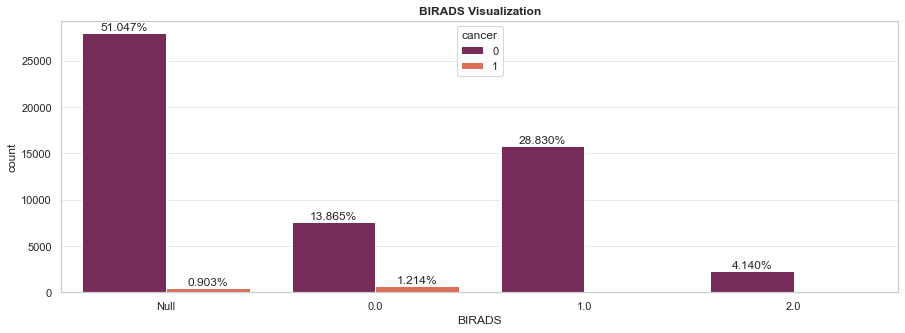

In [23]:
plt.figure(figsize=(15,5))
temp = train.copy();temp.BIRADS.fillna('Null', inplace=True)

ax = sns.countplot(data = temp, x = 'BIRADS', hue='cancer', palette='rocket')
t=train.shape[0];ax.set_title('BIRADS Visualization', fontweight='bold')

for p in ax.patches:
    percentage = f'{100 * p.get_height() / t:.3f}%\n';x = p.get_x() + p.get_width() / 2 ; y = p.get_height();
    ax.annotate(percentage, (x, y), ha='center', va='center');ax.grid(axis='y', linestyle='-', alpha=0.4) 
    
plt.show()

In [30]:
print(clr.S+"More than 50% of records do not have information on BIRADS"+clr.E)
print(clr.S+"For more than 13% of records BIRADS is 0"+clr.E)
print(clr.S+"BIRADS = 0 means abnormality, that warranted further evaluation additional imagine"+clr.E)

More than 50% of records do not have information on BIRADS
For more than 13% of records BIRADS is 0
BIRADS = 0 means abnormality, that warranted further evaluation additional imagine


# Implants

In [26]:
#implant - Whether or not the patient had breast implants.
#Site 1 only provides breast implant information at the patient level, not at the breast level.

train.groupby('cancer').implant \
        .value_counts(normalize=True) \
        .mul(100) \
        .round(2) \
        .reset_index(name='implant_had_percentage')

# 2.73% of patients with implant have cancer status as False
# 1.12% of patients with implant have cancer status as True


,cancer,implant,implant_had_percentage
0,0,0,97.27
1,0,1,2.73
2,1,0,98.88
3,1,1,1.12


In [27]:
implant_patients = train.query('implant == 1') \
    .groupby(['patient_id', 'laterality'], as_index = False) \
    #.agg({'implant':'count'}) \
    #.sort_values('patient_id')
implant_patients.head()

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
793,1,10851,808241086,L,MLO,76.0,0,0,0,0.0,1,B,49,True
794,1,10851,1120382217,L,CC,76.0,0,0,0,0.0,1,B,49,True
795,1,10851,1285202241,L,MLO,76.0,0,0,0,0.0,1,B,49,True
796,1,10851,1441952045,L,MLO,76.0,0,0,0,0.0,1,B,49,True
797,1,10851,1547415696,L,CC,76.0,0,0,0,0.0,1,B,49,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54574,1,9814,443154885,L,MLO,61.0,0,0,0,1.0,1,A,49,False
54575,1,9814,1064110749,L,CC,61.0,0,0,0,1.0,1,A,49,False
54576,1,9814,12369795,R,MLO,61.0,0,0,0,1.0,1,A,49,False
54577,1,9814,1149002441,R,CC,61.0,0,0,0,1.0,1,A,49,False


In [28]:
print(f"\033[1mNumber of Patients with Implants : {train.query('implant == 1').patient_id.nunique()}")

Number of Patients with Implants : 171


In [29]:
persentage_implant = 100 * train.query('implant == 1').patient_id.nunique() / train.patient_id.nunique()
print(f"\033[1mPercent of Patients with Implants : {persentage_implant}")

Percent of Patients with Implants : 1.4354066985645932


In [30]:
#how many images are there with implants?
train.query('implant == 1').agg({'image_id':'count'})
print('There are only 1477 images that contain implants')

There are only 1477 images that contain implants


<AxesSubplot:xlabel='implant', ylabel='count'>

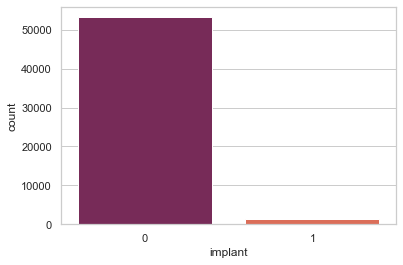

In [35]:
sns.countplot(x = train.implant, palette='rocket')

# BIRADS and implants
Does the presence of implants affect the screening diagnosis and BIRADS?

In [31]:
train['BIRADS'] = train['BIRADS'].fillna('10')
#instead of 'Null' BIRADS gets '10'

In [32]:
train.groupby('BIRADS', as_index = False).agg({'patient_id':'nunique', 'cancer':'nunique'})

#we have 8350 unique patients who have BIRADS = 10

,BIRADS,patient_id,cancer
0,0.0,3287,2
1,1.0,3151,1
2,2.0,604,1
3,10,8350,2


In [33]:
BIRADS_cnacer = train.query("BIRADS == '10' and cancer == 1")['patient_id'].nunique()

print(f"\033[1mNumbers of unique patients who have BIRADS = NaN and cancer = True: {BIRADS_cnacer}")

Numbers of unique patients who have BIRADS = NaN and cancer = True: 234


In [34]:
BIRADS_cnacer = train.query("BIRADS == '10' and cancer == 0")['patient_id'].nunique()

print(f"\033[1mNumbers of unique patients who have BIRADS = NaN and cancer = False: {BIRADS_cnacer}")

Numbers of unique patients who have BIRADS = NaN and cancer = False: 8346


In [35]:
print("\033[1mTraning data have BIRADS, density have more than 45% null values, test data there is no null value")

Traning data have BIRADS, density have more than 45% null values, test data there is no null value


In [36]:
ImplantTrue_cancerTrue = train.query("implant == 1 and cancer == 1")['patient_id'].nunique()
print(f"\033[1mNumbers of unique patients who have Implants = True and cancer = True: {ImplantTrue_cancerTrue}")

Numbers of unique patients who have Implants = True and cancer = True: 3


In [37]:
ImplantTrue_cancerFalse = train.query("implant == 1 and cancer == 0")['patient_id'].nunique()
print(f"\033[1mNumbers of unique patients who have Implants = True and cancer = False: {ImplantTrue_cancerFalse}")

Numbers of unique patients who have Implants = True and cancer = False: 171


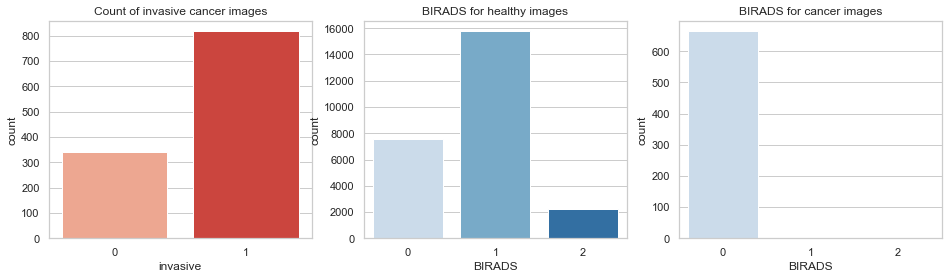

In [39]:
fig, ax = plt.subplots(1, 3, figsize=(16, 4))
sns.countplot(x = train[train['cancer'] == True]['invasive'], ax=ax[0], palette='Reds')
sns.countplot(x = train[train['cancer'] == False]['BIRADS'], order=[0, 1, 2], ax=ax[1], palette='Blues')
sns.countplot(x = train[train['cancer'] == True]['BIRADS'], order=[0, 1, 2], ax=ax[2], palette='Blues')
ax[0].set_title("Count of invasive cancer images")
ax[1].set_title("BIRADS for healthy images")
ax[2].set_title("BIRADS for cancer images")
plt.show()

# Laterality And View

<p style="font-family: Arial; font-size:1.4em;color:blue;">
laterality - Whether the image is of the left or right breast </p>
<p style="font-family: Arial; font-size:1.4em;color:blue;">
view - The orientation of the image. The default for a screening exam is to capture two views per breast
</p>


During a screening exam, the patient goes to an imaging center for a scheduled appointment,
and the mammogram technologist will perform two standard views:
craniocaudal (CC) and mediolateral oblique (MLO)

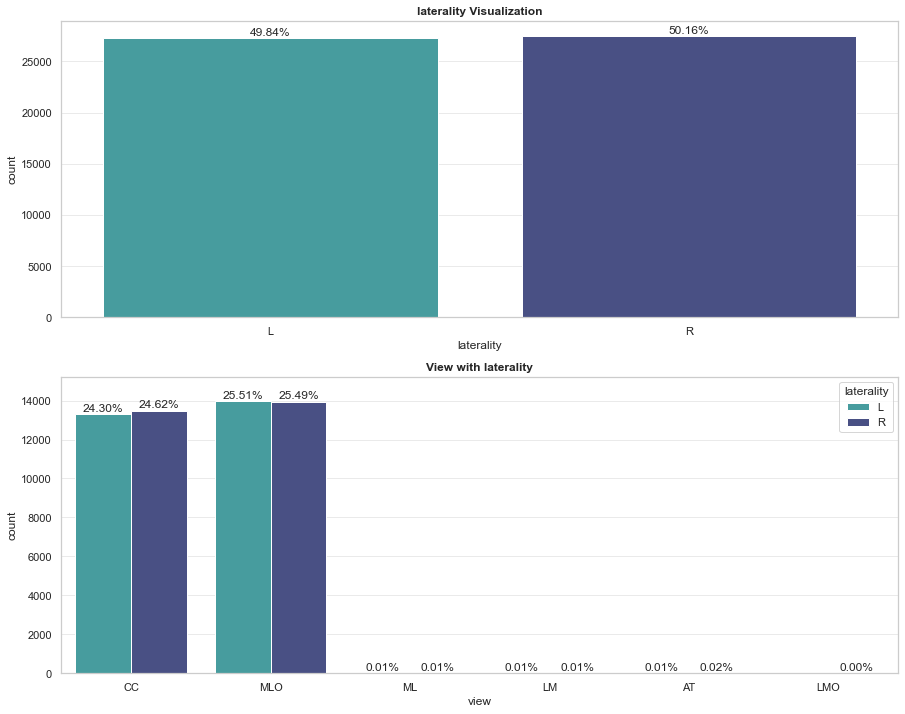

In [38]:
fig, ax = plt.subplots(2,1, figsize=(15,12)) 

sns.countplot(data=train, x='laterality',palette= 'mako_r', ax=ax[0])
sns.countplot(data=train, x='view', hue='laterality',palette="mako_r", ax=ax[1])
t = train.shape[0]
    
for i, ax in enumerate(ax.flatten()):
    ax.grid(axis='y', linestyle='-', alpha=0.4) 
    
    if i==0:ax.set_title('laterality Visualization', fontweight='bold');ax.set_ylim(0,train.laterality.value_counts().values[0]+1500) 
    else:ax.set_ylim(0, train.laterality.value_counts().values[0]/2+1500);ax.set_title('View with laterality',fontweight='bold')
        
        
        
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / t:.2f}%\n'
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2,p.get_height()), ha='center', va='center')
           
plt.show()

In [39]:
laterality_left = len(train[train['laterality']=='L'])
laterality_right = len(train[train['laterality']=='R'])

print(f"\033[1mLaterality Left : {laterality_left}")
print(f"\033[1mLaterality Left : {laterality_right}")

Laterality Left : 27267
Laterality Left : 27439


# Cancer Status Analysis

# Density

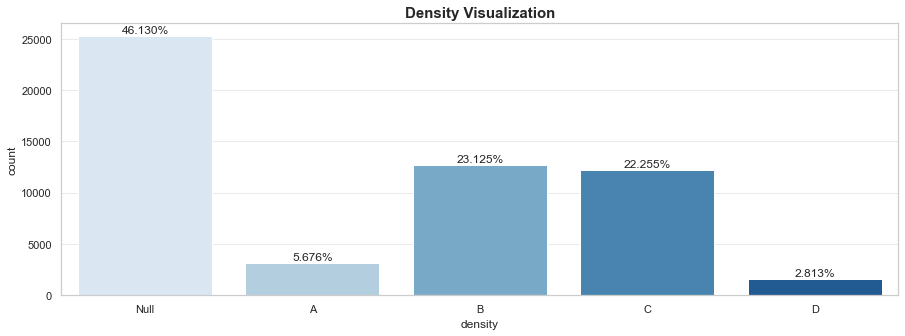

In [56]:
#density - A rating for how dense the breast tissue is, with A being the least dense and D being the most dense.
#Extremely dense tissue can make diagnosis more difficult. Only provided for train.

temp = train.copy();temp.density.fillna('Null', inplace=True)

plt.figure(figsize=(15,5))

ax = sns.countplot(data = temp, x = 'density',order=['Null','A','B','C','D'],palette='Blues')
t=train.shape[0];ax.set_title('Density Visualization', fontweight='bold', fontsize=15)

for p in ax.patches:
    percentage = f'{100 * p.get_height() / t:.3f}%\n';x = p.get_x() + p.get_width() / 2 ; y = p.get_height();
    ax.annotate(percentage, (x, y), ha='center', va='center');ax.grid(axis='y', linestyle='-', alpha=0.4) 
    
plt.show()

In [40]:
print('\033[1m46.1330% of paitents density parameter is null\033[1m\033[0m')
print('\033[1m2.813% is having very dense breast tissue, which will be difficult to diaganosis\033[1m\033[0m')

46.1330% of paitents density parameter is null
2.813% is having very dense breast tissue, which will be difficult to diaganosis


## Biopsy

In [60]:
# biopsy - Whether or not a follow-up biopsy was performed on the breast.

train.groupby('cancer').biopsy \
        .value_counts(normalize=True) \
        .mul(100) \
        .round(2) \
        .reset_index(name='biopsy_done_percentage')

#3.38% people having cancer status False were performed by biopsy

,cancer,biopsy,biopsy_done_percentage
0,0,0,96.62
1,0,1,3.38
2,1,1,100.00


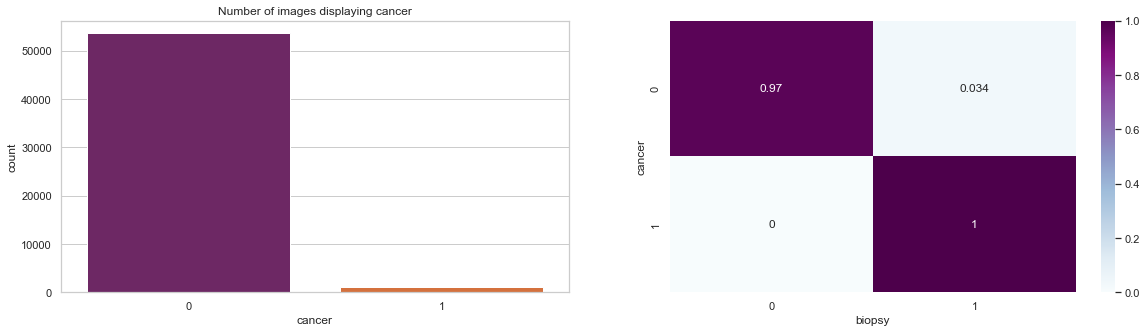

In [47]:
biopsy_counts = train.groupby('cancer').biopsy.value_counts().unstack().fillna(0) 
biopsy_perc = biopsy_counts.transpose() / biopsy_counts.sum(axis=1)

fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.countplot(x = train.cancer, palette='inferno', ax=ax[0])
ax[0].set_title('Number of images displaying cancer');
sns.heatmap(biopsy_perc.transpose(), ax=ax[1], annot=True, cmap='BuPu');

* The number of images displaying cancer is very low. It should be even of lower percentage than the number of patients with cancer.
* Looking at the biopsy feature we can say that all patients with cancer had a biopsy.
* But only around 3 % of images without cancer had resulted in a follow-up biopsy. Maybe we should better have a look at this feature on the patient-level.

 ## Invasive Cancer

<AxesSubplot:xlabel='invasive', ylabel='count'>

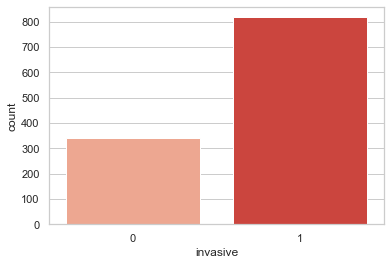

In [45]:
sns.countplot(x = train[train.cancer==1].invasive, palette='Reds')

## Machine IDs

How many different imaging devices were used?



In [51]:
print(f"\033[1mThere were used {train.machine_id.nunique()} different imaging devices")

There were used 10 different imaging devices


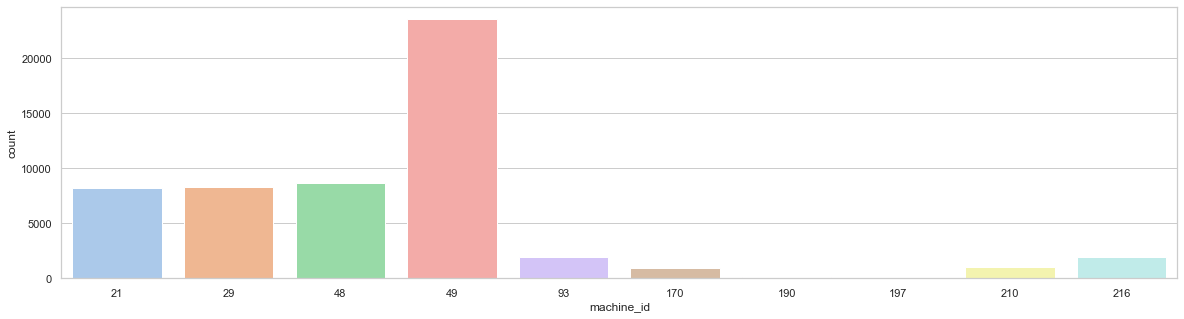

In [50]:
fig, ax = plt.subplots(1,1,figsize=(20,5))
sns.countplot(x = train.machine_id, palette='pastel', ax=ax);

In [52]:
print('\033[1mMost of the images are from machine 49, 21, 29 and 48\033[1m\033[0m')
print('\033[1mMachine difference can lead to image distribution difference\033[1m\033[0m')

Most of the images are from machine 49, 21, 29 and 48
Machine difference can lead to image distribution difference
